# Hierarchical Clustering with Similarity Features

In [1]:
%%capture
%run text_feature_selection_partI.ipynb

### Document Clustering with Similarity Features
We have been building a lot of features, but let’s use some of them now for a real-world problem of grouping similar documents. Clustering leverages unsupervised learning to group data points (documents in this scenario) into groups or clusters. 

We leverage an unsupervised hierarchical clustering algorithm here to try to group similar documents from our toy corpus by leveraging the document similarity features we generated earlier.

There are two types of hierarchical clustering algorithms—agglomerative and divisive. We use an agglomerative clustering algorithm, which is hierarchical clustering using a bottom-up approach, i.e., each observation or document starts in its own cluster and clusters are successively merged using a distance metric that measures distances between data points and a linkage merge criterion. 

The selection of the linkage criterion governs the merge strategy. Some examples of linkage criteria are Ward, Complete linkage, Average linkage, and so on. This criterion is very useful for choosing the pair of clusters (individual documents at the lowest step and clusters in higher steps) to merge at each step, which is based on the optimal value of an objective function. We choose the Ward’s minimum variance method as our linkage criterion to minimize total within-cluster variance. Hence, at each step, we find the pair of clusters that leads to the minimum increase in total within-cluster variance after merging. Since we already have our similarity features, let’s build the linkage matrix on our sample documents.

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2',
                         'Distance', 'Cluster Size'], dtype="object")

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2.0,7.0,0.253098,2.0
1,0.0,6.0,0.308539,2.0
2,5.0,8.0,0.386952,3.0
3,1.0,9.0,0.489845,3.0
4,3.0,4.0,0.732945,2.0
5,11.0,12.0,2.695647,5.0
6,10.0,13.0,3.451082,8.0


If you closely look at the linkage matrix, you can see that each step (row) of the linkage matrix tells us which data points (or clusters) were merged. If you have `n` data points, the linkage matrix `Z` will have a shape of `(n − 1) × 4` where `Z[i]` will tell us which clusters were merged at step `i`. 

Each row has four elements:
* the first two elements are either data point identifiers or cluster labels (in the later parts of the matrix once multiple data points are merged), 
* the third element is the cluster distance between the first two elements (either data points or clusters), 
* and the last element is the total number of elements/data points in the cluster once the merge is complete.

You can refer to the SciPy documentation, which explains this in detail. Let’s now visualize this matrix as a dendrogram to understand the elements better.

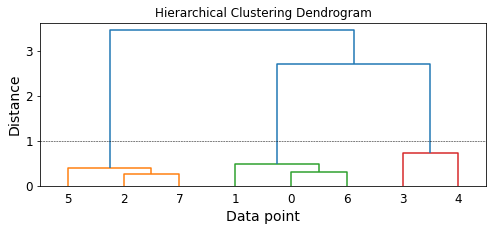

In [3]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c="k", ls="--", lw=0.5)

We can see how each data point starts as an individual cluster and is slowly merged with other data points to form clusters. On a high level from the colors and the dendrogram, you can see that the model has correctly identified three major clusters if you consider a distance metric of around 1.0 or above (denoted by the dotted line). Leveraging this distance, we get our cluster labels.

In [4]:
from scipy.cluster.hierarchy import fcluster

max_dist = 1.0
cluster_labels = fcluster(Z, max_dist, 
criterion="distance")
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, e...",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beaut...,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


Thus you can clearly see our algorithm has correctly identified the three distinct categories in our documents based on the cluster labels assigned to them. This should give you a good idea of how our TF-IDF features were leveraged to build our similarity features, which in turn helped in clustering our documents. You can use this pipeline in the future for clustering your own documents. 